Install Prophet

In [5]:
from flask import Flask

In [6]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "<p>Hello, APAN5450 Class!</p>"

app.run(host="44.203.143.133", port=80)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: [Errno 49] Can't assign requested address

In [130]:
#!pip install prophet

Import dataset

In [131]:
import pandas as pd
import seaborn as sns

electricity = pd.read_csv('AEP_hourly.csv')
electricity = electricity[['Datetime','AEP_MW']]
electricity.columns = ['ds','y']
electricity = electricity.iloc[:2000]
electricity

ds        y
0     2004-12-31 01:00:00  13478.0
1     2004-12-31 02:00:00  12865.0
2     2004-12-31 03:00:00  12577.0
3     2004-12-31 04:00:00  12517.0
4     2004-12-31 05:00:00  12670.0
...                   ...      ...
1995  2004-10-09 05:00:00  11064.0
1996  2004-10-09 06:00:00  11356.0
1997  2004-10-09 07:00:00  11733.0
1998  2004-10-09 08:00:00  12495.0
1999  2004-10-09 09:00:00  13063.0

[2000 rows x 2 columns]

Simple moving average

<AxesSubplot:>

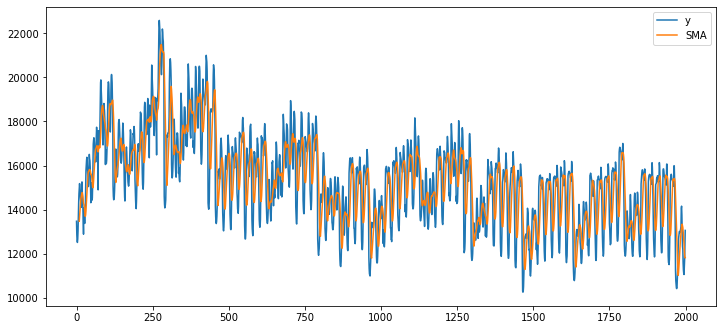

In [132]:
import numpy as np
import matplotlib.pyplot as plt

electricity['SMA'] = electricity.iloc[:,1].rolling(window=10).mean()
electricity['diff'] = electricity['y'] - electricity['SMA']
plt.rcParams["figure.figsize"] = (12,5.5)
electricity[['y','SMA']].plot()
#electricity

Text(0.5, 1.0, 'The distribution of diff')

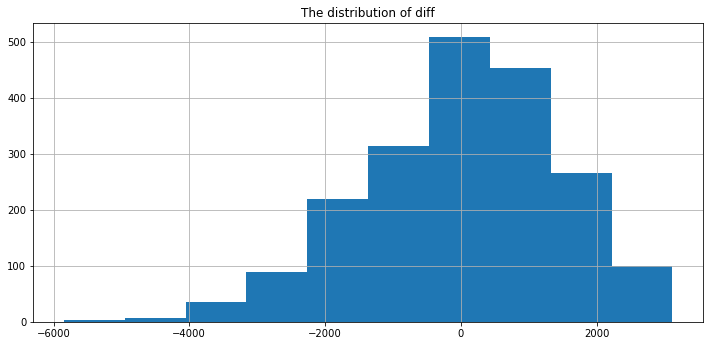

In [133]:
electricity['diff'].hist()
plt.title('The distribution of diff')

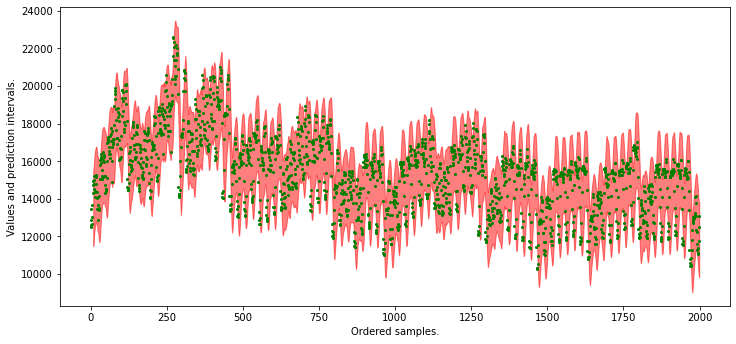

In [134]:
electricity['upper'] = electricity['SMA'] + 2000
electricity['lower'] = electricity['SMA'] - 2000
electricity[10:20]
def plot_it():
    plt.plot(electricity['y'],'go',markersize=2,label='Actual')
    plt.fill_between(
        np.arange(electricity.shape[0]), electricity['lower'], electricity['upper'], alpha=0.5, color="r",
        label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    #plt.rcParams["figure.figsize"] = (10,8)
    plt.show()

plot_it()

Exponential smoothing

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



<AxesSubplot:>

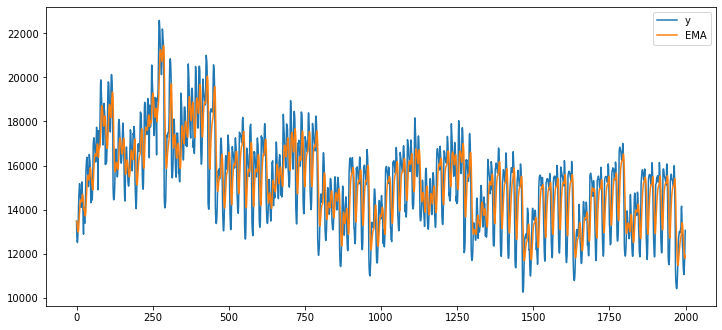

In [135]:
from statsmodels.tsa.api import SimpleExpSmoothing

EMAfit = SimpleExpSmoothing(electricity['y']).fit(smoothing_level=0.2,optimized=False)
EMA = EMAfit.forecast(3).rename(r'$\alpha=0.2$')
electricity['EMA'] = EMAfit.predict(start = 0)
electricity[['y','EMA']].plot()

Text(0.5, 1.0, 'The distribution of diff')

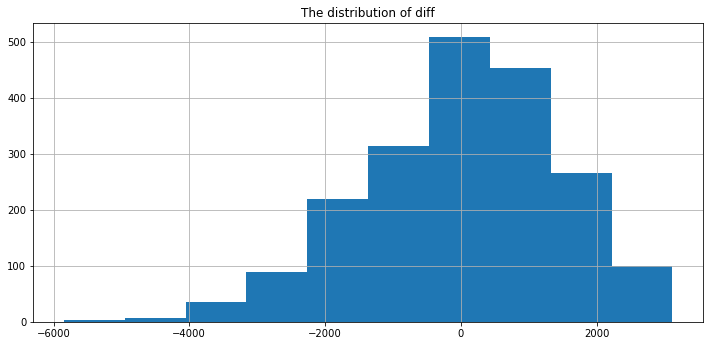

In [136]:
electricity['diff'].hist()
plt.title('The distribution of diff')

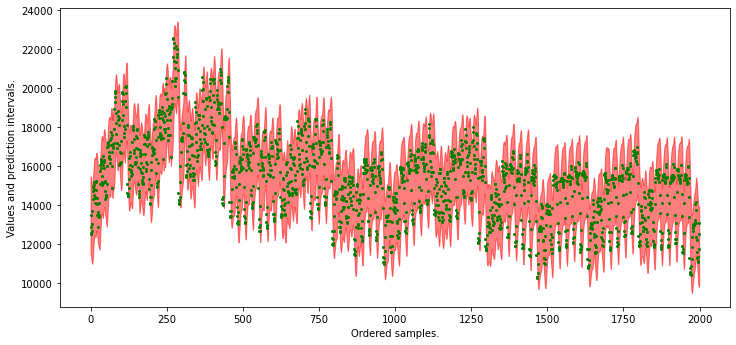

In [137]:
electricity['upper'] = electricity['EMA'] + 2000
electricity['lower'] = electricity['EMA'] - 2000
plot_it()

Seasonal-Trend Decomposition

<AxesSubplot:xlabel='ds'>

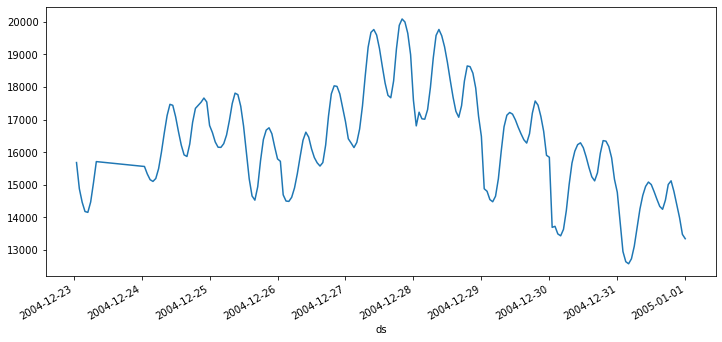

In [138]:
import statsmodels.api as sm

electricity = electricity.reset_index(drop='index') #inplace=True)
electricity.index = pd.to_datetime(electricity['ds'])

result = sm.tsa.seasonal_decompose(electricity['y'], model='additive', period=2)
result.trend[1:200].plot()
#electricity

<AxesSubplot:xlabel='ds'>

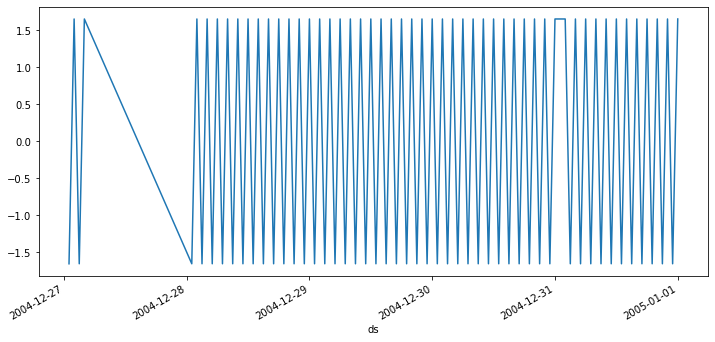

In [139]:
result.seasonal[1:100].plot()

<AxesSubplot:xlabel='ds'>

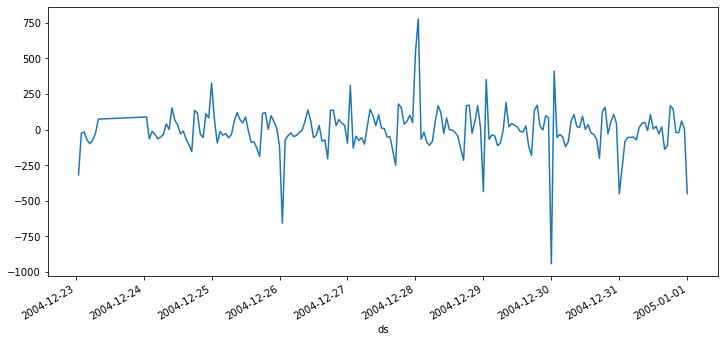

In [140]:
result.resid[1:200].plot()

The Prophet module

In [141]:
#!pip install fbprophet

In [142]:
from fbprophet import Prophet
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

# Fitting with default parameters
electricity_model_0 = Prophet(daily_seasonality=True)
electricity_model_0.fit(electricity)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [143]:
future= electricity_model_0.make_future_dataframe(periods=20, freq='d')
future.tail()

electricity_model_0_data=electricity_model_0.predict(future)
electricity_model_0_data.tail()

ds         trend   yhat_lower    yhat_upper  trend_lower  \
2015 2005-01-17  13045.915702  8158.495907  15978.188971  9190.379421   
2016 2005-01-18  12880.499375  9000.052590  17587.811206  8669.216977   
2017 2005-01-19  12715.083049  7540.146829  17130.091082  8141.630457   
2018 2005-01-20  12549.666722  7291.106105  16933.691627  7452.351848   
2019 2005-01-21  12384.250395  6255.536623  16890.442261  6922.971076   

       trend_upper  additive_terms  additive_terms_lower  \
2015  16694.936952     -917.821400           -917.821400   
2016  16862.870113      471.191399            471.191399   
2017  17016.327109     -366.535733           -366.535733   
2018  17254.183188     -401.601619           -401.601619   
2019  17620.903725     -777.689932           -777.689932   

      additive_terms_upper       daily  daily_lower  daily_upper       weekly  \
2015           -917.821400 -747.422037  -747.422037  -747.422037  -170.399363   
2016            471.191399 -747.422037  -747.422037  -747.422037  1218.613436   
2017           -366.535733 -747.422037  -747.422037  -747.422037   380.886304   
2018           -401.601619 -747.422037  -747.422037  -747.422037   345.820418   
2019           -777.689932 -747.422037  -747.422037  -747.422037   -30.267895   

      weekly_lower  weekly_upper  multiplicative_terms  \
2015   -170.399363   -170.399363                   0.0   
2016   1218.613436   1218.613436                   0.0   
2017    380.886304    380.886304                   0.0   
2018    345.820418    345.820418                   0.0   
2019    -30.267895    -30.267895                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
2015                         0.0                         0.0  12128.094302  
2016                         0.0                         0.0  13351.690775  
2017                         0.0                         0.0  12348.547316  
2018                         0.0                         0.0  12148.065103  
2019                         0.0                         0.0  11606.560463

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


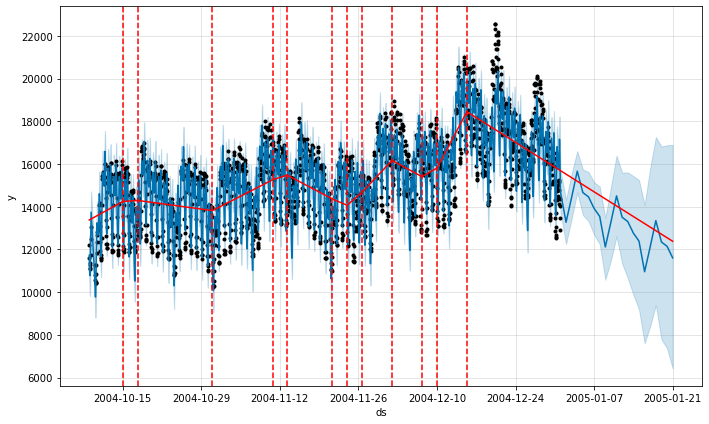

In [144]:
from fbprophet.plot import add_changepoints_to_plot
electricity_model_1 = Prophet(daily_seasonality=True)
forecast = electricity_model_1.fit(electricity).predict(future)
fig= electricity_model_1.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), electricity_model_1, forecast)

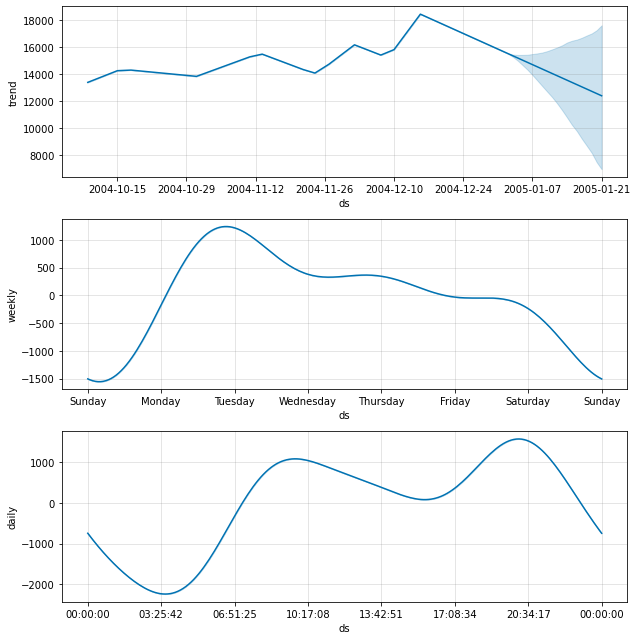

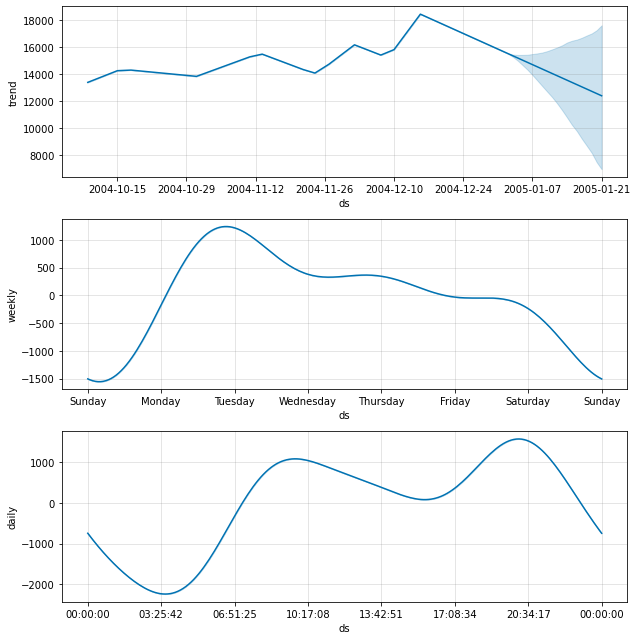

In [145]:
electricity_model_0.plot_components(electricity_model_0_data)